# Sales Analysis

#### Importing Necessary Libraries

In [1]:
import pandas as pd

#### Task1: Merge the 12 months of sales data into a single CSV file

In [39]:
df=pd.read_csv('C:\\DS\\Projects\\Data Analysis\\Keith Galli\\Data\\Sales_January_2019.csv')
df.head()      #importing one file

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [3]:
#importing multiple files using 'os'---- Googled it
import os 

In [4]:
files= [file for file in os.listdir('C:\DS\Projects\Data Analysis\Keith Galli\Data')]
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
#Merging all files
all_data= pd.DataFrame()

for file in files:
    df=pd.read_csv('C:\\DS\\Projects\\Data Analysis\\Keith Galli\\Data\\' + file)
    all_data= pd.concat([all_data, df])

#To check if it worked, lets write file and open it in excel
all_data.to_csv('C:\\DS\\Projects\\Data Analysis\\Keith Galli\\Data\\all_data.csv', index=False)

#### Read updated dataframe
For further analysis we want all months data

In [41]:
all_data=pd.read_csv('C:\\DS\\Projects\\Data Analysis\\Keith Galli\\Data\\all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Q1: What was the best month for sales? How much was earned that month

In [7]:
#We don't have column for month so lets add a specific column for month

In [42]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [43]:
#Now lets convert month column to int format
#all_data['Month']= all_data['Month'].astype('int32')
#above was code to convert data to int but we got error 'cannot convert float NaN to integer' because we have NaN in column
#lets find those NaN rows
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1306276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307648,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#Now lets drop na value rows
all_data= all_data.dropna(how='all')
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df                  #No row with nan value

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [11]:
#Now lets convert month column to number type
#all_data['Month']= all_data['Month'].astype('int32')
#we still got an error- invalid literal for int() with base 10: 'Or'
#This means month column has 'Or' in it. This means date column needs cleaning

In [45]:
#lets find rows with 'Or'
Or_row= all_data[all_data['Order Date'].str[0:2]== 'Or']
Or_row.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [46]:
#Now lets get data without 'Or'. So our new all_data will be
all_data= all_data[all_data['Order Date'].str[0:2] != 'Or']
Or_row= all_data[all_data['Order Date'].str[0:2]== 'Or']
Or_row                   #No row with 'Or'

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [47]:
#Now lets convert month column to number type
all_data['Month']= all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [48]:
#Now to answer our question we need a sales which means we need product of 'Quantity Ordered' and 'Price Each'
#Now lets add a 'Sales' column
#all_data['Sales']= all_data['Quantity Ordered']*all_data['Price Each']
#when we run above code we got error- can't multiply sequence by non-int of type 'str'
#This means either of column has value of int type. So lets convert those columns to int type
#"all_data['Quantity Ordered']= all_data['Quantity Ordered'].astype('int32')"
#we can do like this but we'll use other method- 'pd.to_numeric'
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered']) #to make it int
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) #Now we have numeric type columns 

In [49]:
#Now lets add a 'Sales' column
all_data['Sales']= all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [50]:
#Now lets reorder columns
all_data= all_data[['Order ID','Product','Quantity Ordered','Price Each','Sales','Order Date','Month','Purchase Address']]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"


#Now lets answer our question
#### Q1: What was the best month for sales? How much was earned that month

In [51]:
#For this we'll use groupby function
groupby=all_data.groupby('Month').sum()
groupby

,Quantity Ordered,Price Each,Sales
Month,,,
1,76321,1.268238e+07,1.275580e+07
2,94143,1.532219e+07,1.541416e+07
3,119035,1.953845e+07,1.964970e+07
4,143906,2.357370e+07,2.373469e+07
5,130669,2.194588e+07,2.206825e+07
6,106771,1.793418e+07,1.804462e+07
7,112504,1.842778e+07,1.853443e+07
8,94136,1.561242e+07,1.571128e+07
9,91763,1.459494e+07,1.468292e+07


In [19]:
#From the above table we can see that December was the best month for sales

Text(0, 0.5, 'Month number')

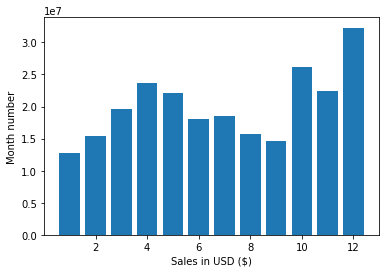

In [52]:
#We can visualize this data
import matplotlib.pyplot as plt
%matplotlib inline
months=range(1,13)
plt.bar(months,groupby['Sales'])
plt.xlabel('Sales in USD ($)')
plt.ylabel('Month number')

### Q2: Which city had the highest number of sales?

In [53]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"


In [23]:
#First we need to add 'City' column using .apply() function

In [60]:
def get_city(adress):
    return adress.split(',')[1]
def get_state(adress):
    return adress.split(',')[2]

all_data['City']= all_data['Purchase Address'].apply(lambda x: get_city(x)+ ' ' +get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston MA 02215
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles CA 90001
